# Goal

This notebook shows that the starting position of a MetropolisHastings can get stuck on local maxima. The parameters for the likelihood and generator function are chosen so that we can see the occasional jump from one area to another

# Imports

In [1]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

from src.algorithms import AbstractMetropolisHastings

figsize(20, 5)


# Setup

We use the likelihood function $e^{-a_0(x-a_1)^2} + e^{-a_2(x-a_3)^2}$

In [2]:
class Doublet(AbstractMetropolisHastings[float]):

    def generator_function(self):
        sigma = 1
        return self.current_configuration + np.random.normal(0, sigma)

    def state_likelihood(self, x: float):
        d = 3
        a = [1, -1 * d, 1, d]
        aux_exp = lambda mu, sigma: np.exp(np.prod([-1, mu, x - sigma, x - sigma]))
        return aux_exp(a[0], a[1]) + aux_exp(a[2], a[3])

    def __repr__(self):
        # Useful for outputting the class
        return f"{self.current_configuration:e}"

# Trial run

In [3]:
doublet = Doublet(initial_configuration=np.random.normal(0, 1))
doublet.run_iterations(n=10 ** 4)

Bar desc: 100%|██████████| 10000/10000 [00:00<00:00, 27140.12it/s]


Text(0, 0.5, 'Candidates')

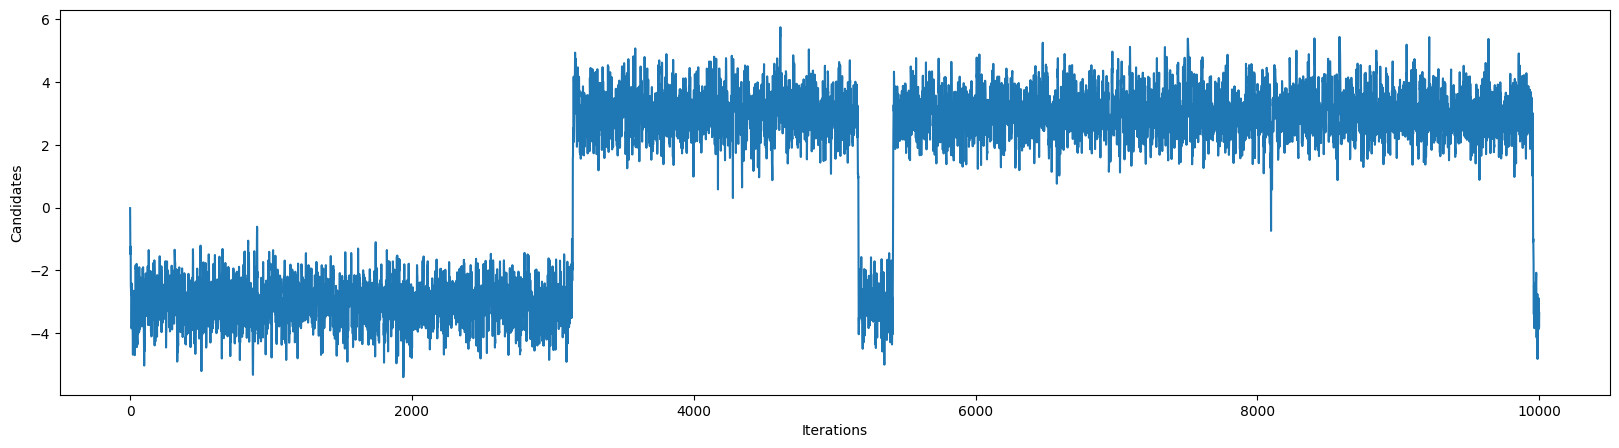

In [4]:
plt.plot(doublet.configuration_history)
plt.xlabel("Iterations")
plt.ylabel("Candidates")